# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from config import weather_api_key
from config import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output file
weather_df = pd.read_csv("cities.csv")

# Range of latitudes and longitudes
lat_range = (-50, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
cities = []
lat_long = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-50.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

697


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")
for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | pokhara.
Processing Record 1  of Set 1 | manzanillo.
Processing Record 2  of Set 1 | rikitea.
Processing Record 3  of Set 1 | carnarvon.
Processing Record 4  of Set 1 | hami.
Processing Record 5  of Set 1 | troitsko-pechorsk.
Processing Record 6  of Set 1 | busselton.
Processing Record 7  of Set 1 | arraial do cabo.
Processing Record 8  of Set 1 | butaritari.
Processing Record 9  of Set 1 | dicabisagan.
Processing Record 10  of Set 1 | kibuye.
Processing Record 11  of Set 1 | barrow.
Processing Record 12  of Set 1 | airai.
Processing Record 13  of Set 1 | louisbourg.
City not found...skipping louisbourg.
Processing Record 14  of Set 1 | meadow lake.
Processing Record 15  of Set 1 | rong kwang.
Processing Record 16  of Set 1 | arman.
Processing Record 17  of Set 1 | kitimat.
Processing Record 18  of Set 1 | tasiilaq.
Processing Record 19  of Set 1 | meulaboh.
Processing Record 20  of Set 1 | nanortali

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
# Data Count
weather_df.count()

City                697
Country             697
Date                697
Latitude            697
Longitude           697
Cloudiness (%)      697
Humidity (%)        697
Max Temp (F)        697
Wind Speed (mph)    697
dtype: int64

In [31]:
# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,pokhara,NP,2022-06-19 22:51:59,28.2333,83.9833,96,84,73.148,2.71
1,manzanillo,CU,2022-06-19 22:52:00,20.3433,-77.1167,100,78,76.19,0.14
2,rikitea,PF,2022-06-19 22:52:00,-23.1203,-134.9692,100,73,72.68,6.05
3,carnarvon,AU,2022-06-19 22:52:01,-24.8667,113.6333,1,70,68.594,5.59
4,hami,CN,2022-06-19 22:52:02,42.8,93.45,100,11,89.294,2.14


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
weather_df1= weather_df['Humidity (%)']
weather_df1.head()

0    84
1    78
2    73
3    70
4    11
Name: Humidity (%), dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

From our plot we can see that temperature is high at the equator and temperature generally drops as we move away from the equator


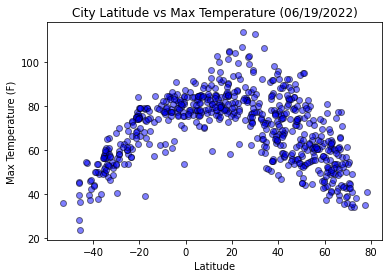

In [37]:
plot = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({plot})")
print("From our plot we can see that temperature is high at the equator and temperature generally drops as we move away from the equator")

## Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


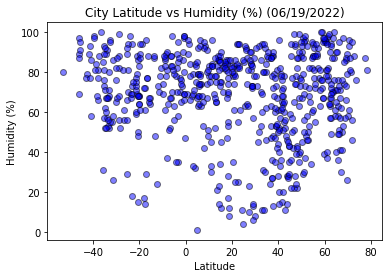

In [38]:
plot = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({plot})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

## Latitude vs. Cloudiness Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


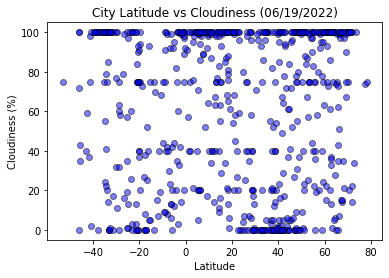

In [39]:
plot = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({plot})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")

## Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


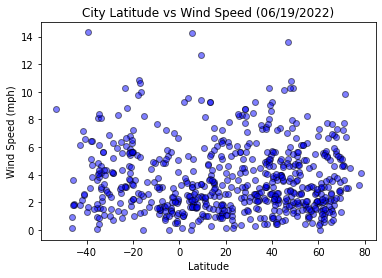

In [40]:
plot = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({plot})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")

## Linear Regression

In [41]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6841031892708707
The regression displays a negative correlation.
In the nothern hemisphere, the temperature reduces as you move away from the equator.


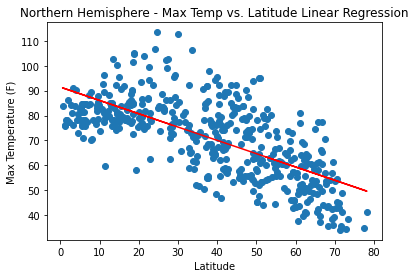

In [45]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, the temperature reduces as you move away from the equator.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8370578235261728
The regression displays a positive correlation.
In the southern hemisphere, the temperature increases as you get closer to the equator.


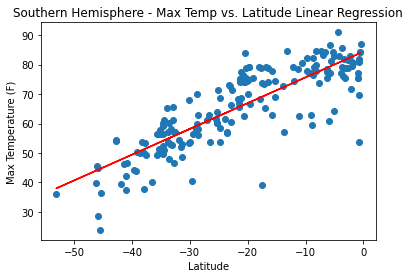

In [47]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, the temperature increases as you get closer to the equator.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03451530581401922
There is no significant correlation in the data set.


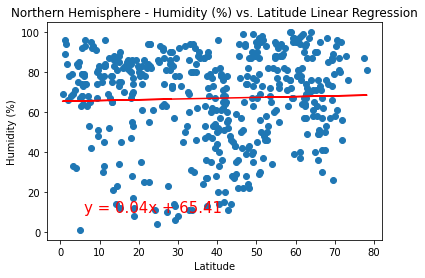

In [53]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("There is no significant correlation in the data set.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.06398081476829907
The regression does not display a correlation between the datasets.


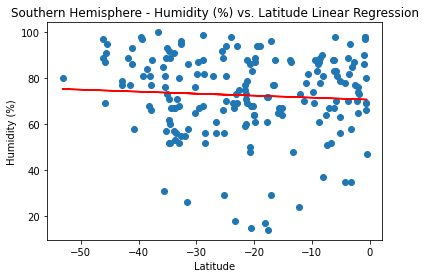

In [50]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display a correlation between the datasets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.0030317325473508583
The regression does not display a correlation between the data sets.


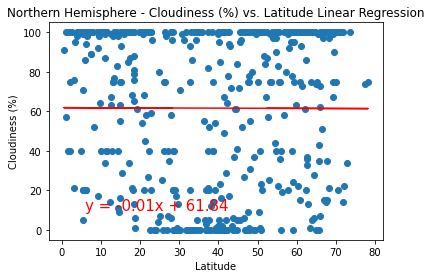

In [51]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.08962905648510798
The regression displays a positive correlation  with a negative coefficient between the two data sets.The cloudiness reduces in tandem with the latitude.


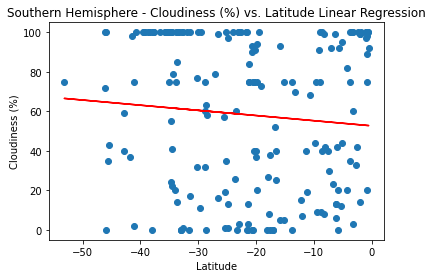

In [60]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression displays a positive correlation  with a negative coefficient between the two data sets.The cloudiness reduces in tandem with the latitude.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03281905119208289
The regression does not display a significant correlation between the data sets.


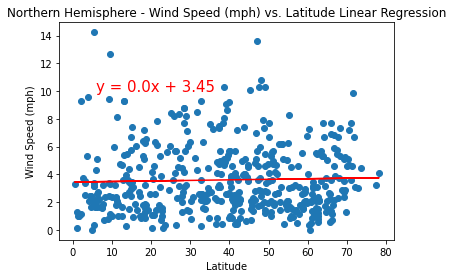

In [56]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display a significant correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.14670145046534902
The regression displays a positive correlation  with a negative coefficient. As the latitude decreases so does the wind speed.


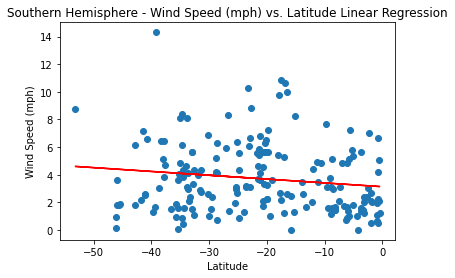

In [58]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression displays a positive correlation  with a negative coefficient. As the latitude decreases so does the wind speed.")
plt.show()